In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
 
data = pd.read_csv("Improved_All_Combined_hr_rsp_binary.csv")
   
print (data.head(10))

   Participant      HR      respr   Time(sec)  Label
0            2  118.00  12.127693  1644227583      0
1            2  113.50  12.127693  1644227584      0
2            2   93.00  12.127693  1644227585      0
3            2   93.25  12.127693  1644227586      0
4            2   86.40  12.127693  1644227587      0
5            2   81.83  12.127693  1644227588      0
6            2   79.71  12.127693  1644227589      0
7            2   78.12  12.127693  1644227590      0
8            2   76.67  12.127693  1644227591      0
9            2   75.60  12.127693  1644227592      0


In [6]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [7]:
import graphviz

In [8]:
data.describe()


,Participant,HR,respr,Time(sec),Label
count,112516.000000,112472.000000,112516.000000,1.125160e+05,112516.000000
mean,18.475470,80.216177,12.465482,1.645692e+09,0.327198
std,9.871133,12.732206,2.030810,8.179419e+05,0.469192
min,2.000000,49.000000,5.204728,1.644228e+09,0.000000
25%,10.000000,71.330000,11.191843,1.644846e+09,0.000000
50%,18.000000,77.890000,12.743635,1.645461e+09,0.000000
75%,27.000000,87.020000,13.877519,1.646648e+09,1.000000
max,35.000000,146.780000,18.163532,1.646842e+09,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112516 entries, 0 to 112515
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Participant  112516 non-null  int64  
 1   HR           112472 non-null  float64
 2   respr        112516 non-null  float64
 3   Time(sec)    112516 non-null  int64  
 4   Label        112516 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 4.3 MB


In [10]:
data['Label'].value_counts()

Label
0    75701
1    36815
Name: count, dtype: int64

In [11]:
data.isnull().sum()

Participant     0
HR             44
respr           0
Time(sec)       0
Label           0
dtype: int64

In [12]:
data["HR"] = data["HR"].replace(np.NaN, data["HR"].mean())
print(data["HR"][:10])

0    118.00
1    113.50
2     93.00
3     93.25
4     86.40
5     81.83
6     79.71
7     78.12
8     76.67
9     75.60
Name: HR, dtype: float64


In [13]:
data.isnull().sum()

Participant    0
HR             0
respr          0
Time(sec)      0
Label          0
dtype: int64

In [14]:
data.shape

(112516, 5)

c:\Users\ayush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


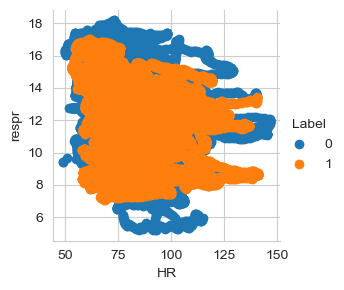

In [15]:
sns.set_style('whitegrid')
sns.FacetGrid(data, hue = 'Label').map(plt.scatter, 'HR','respr') .add_legend()
plt.show()

c:\Users\ayush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


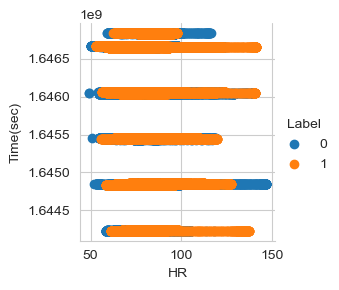

In [16]:
sns.set_style('whitegrid')
sns.FacetGrid(data, hue = 'Label').map(plt.scatter, 'HR','Time(sec)') .add_legend()
plt.show()

c:\Users\ayush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


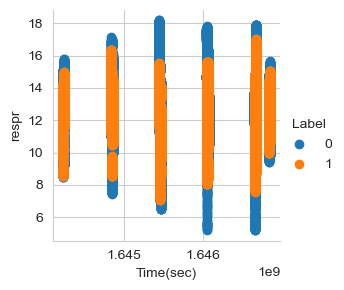

In [17]:
sns.set_style('whitegrid')
sns.FacetGrid(data, hue = 'Label').map(plt.scatter, 'Time(sec)','respr') .add_legend()
plt.show()

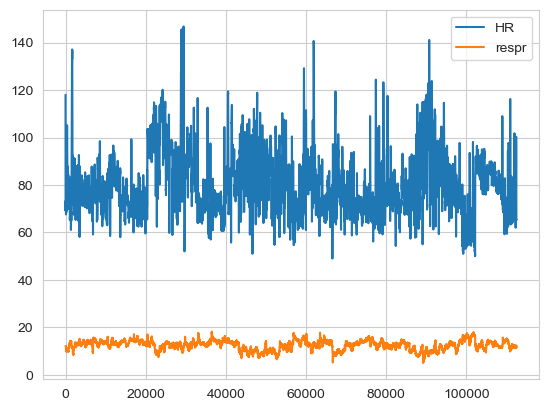

In [18]:
plt.plot(data["HR"],label ="HR")
plt.plot(data["respr"],label ="respr")
plt.legend()
plt.show()

c:\Users\ayush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


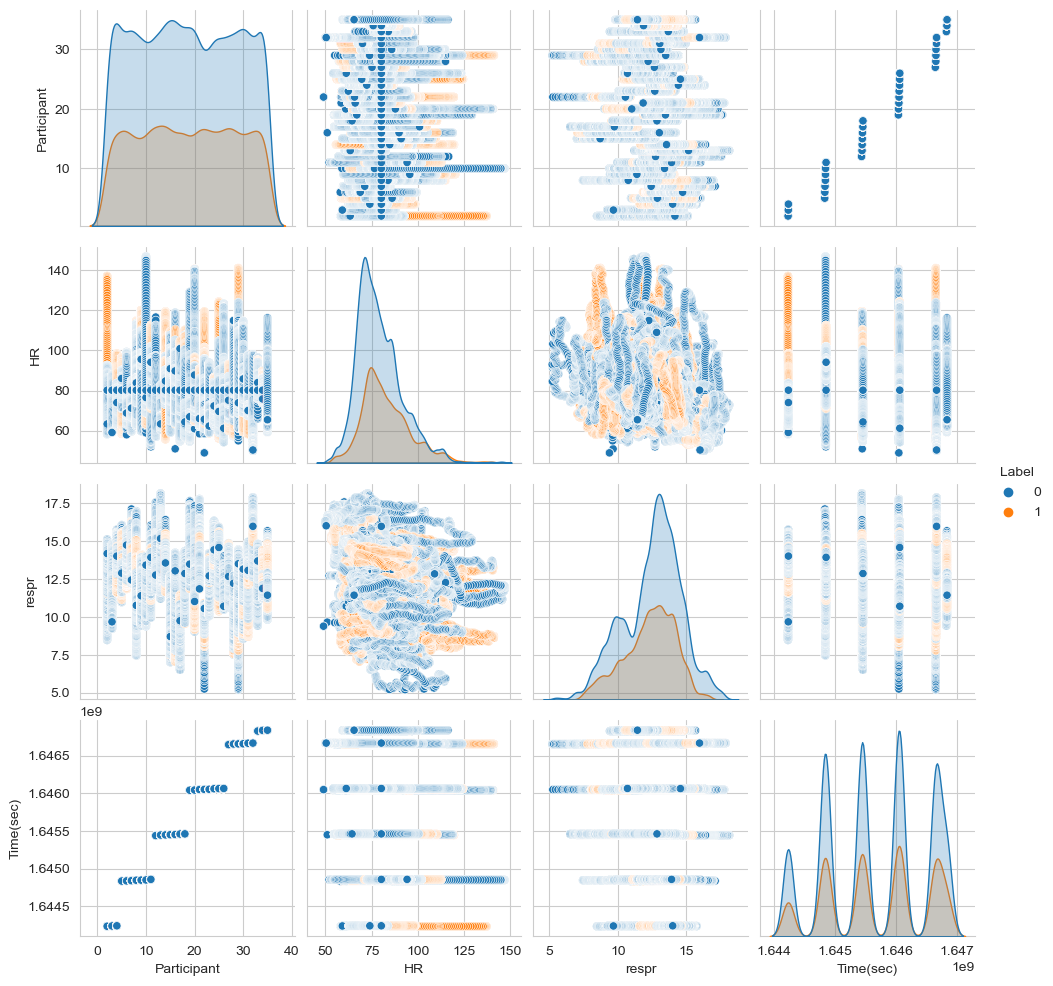

In [19]:
sns.pairplot(data,hue="Label")
plt.show()



c:\Users\ayush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


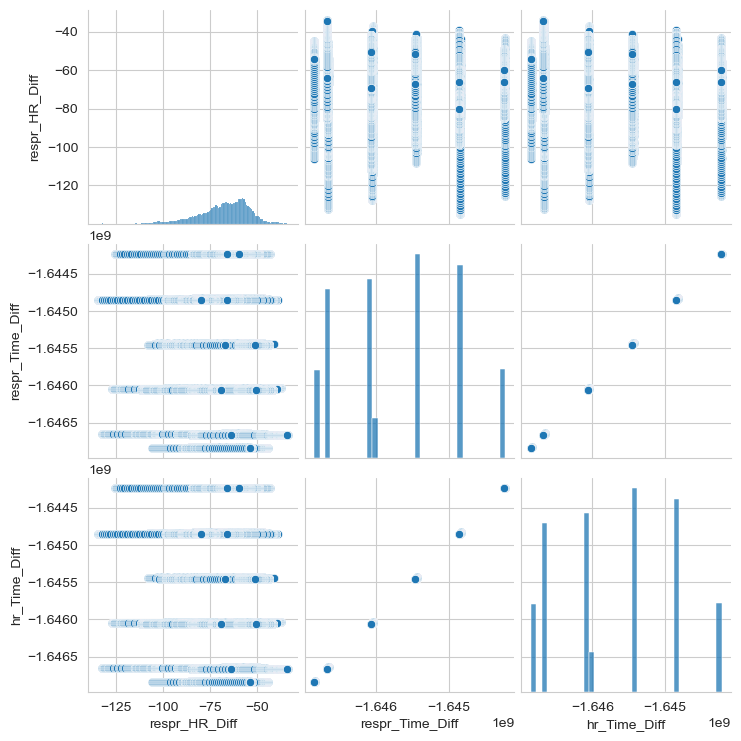

In [20]:
data['respr_HR_Diff'] = data['respr'] - data['HR']
data['respr_Time_Diff'] = data['respr'] - data['Time(sec)']
data['hr_Time_Diff'] = data['HR'] - data['Time(sec)']

sns.pairplot(data[['respr_HR_Diff','respr_Time_Diff','hr_Time_Diff']])
plt.show()

c:\Users\ayush\anaconda3\Lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\ayush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\ayush\anaconda3\Lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\ayush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


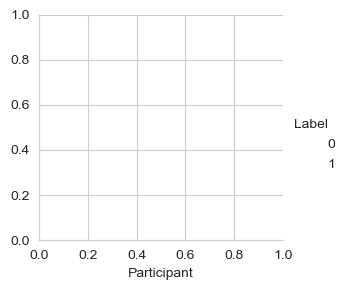

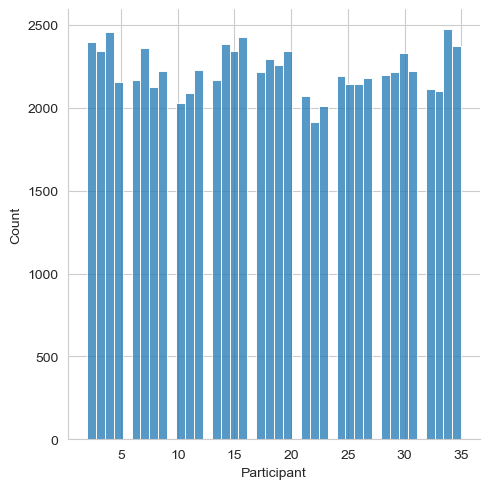

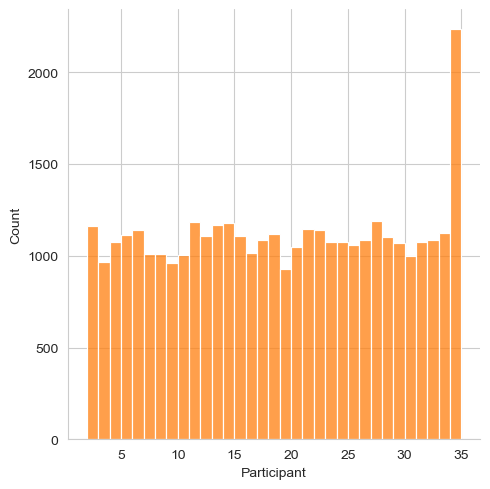

c:\Users\ayush\anaconda3\Lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\ayush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\ayush\anaconda3\Lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\ayush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


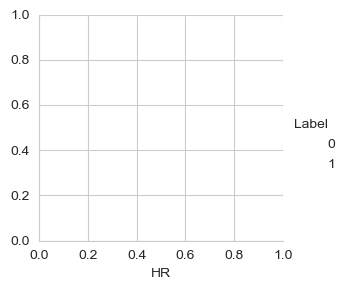

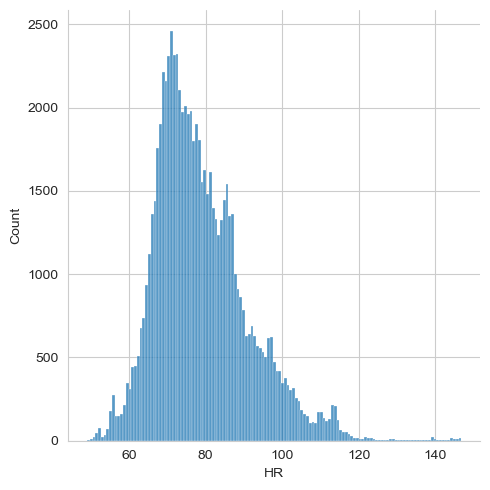

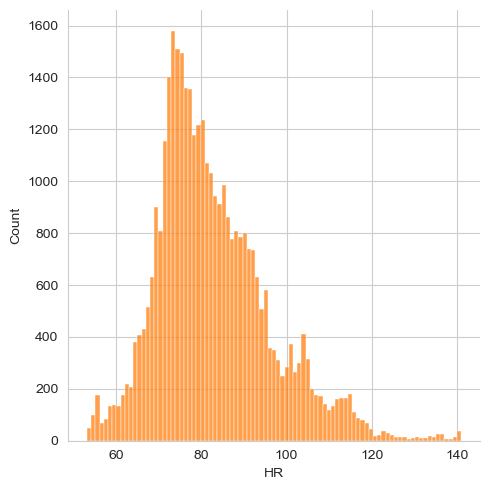

c:\Users\ayush\anaconda3\Lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\ayush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\ayush\anaconda3\Lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\ayush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


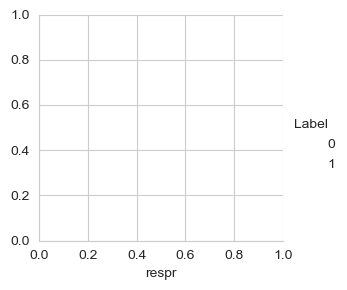

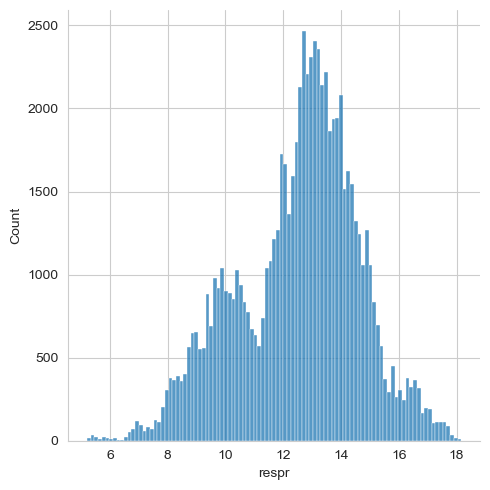

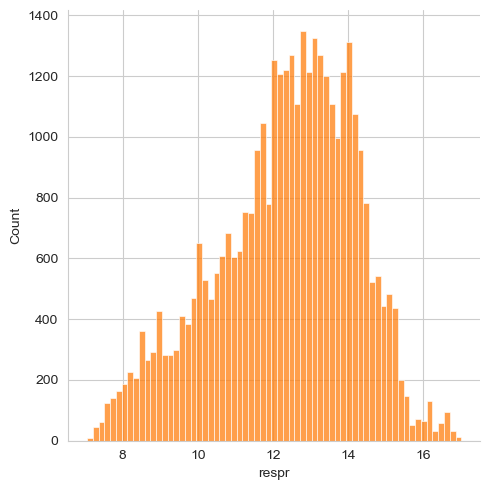

c:\Users\ayush\anaconda3\Lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\ayush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\ayush\anaconda3\Lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\ayush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


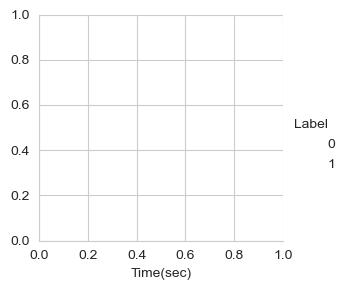

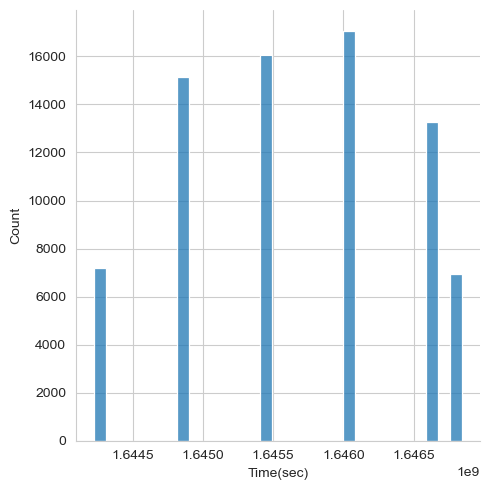

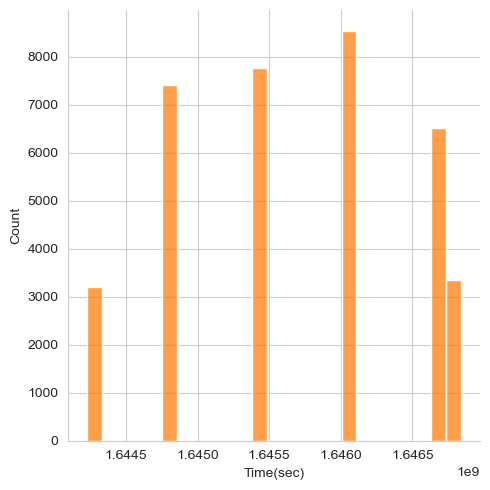

c:\Users\ayush\anaconda3\Lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\ayush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\ayush\anaconda3\Lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\ayush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


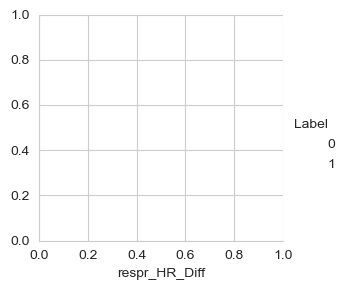

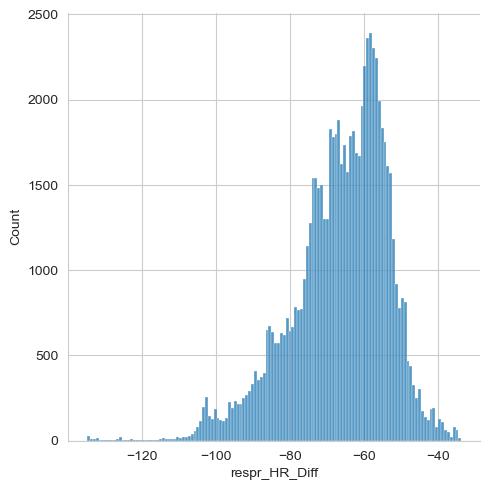

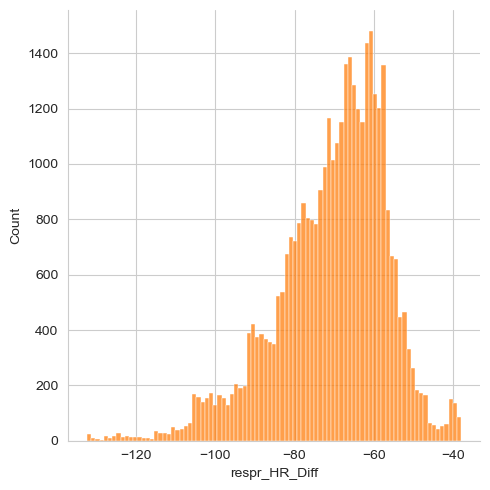

c:\Users\ayush\anaconda3\Lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\ayush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\ayush\anaconda3\Lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\ayush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


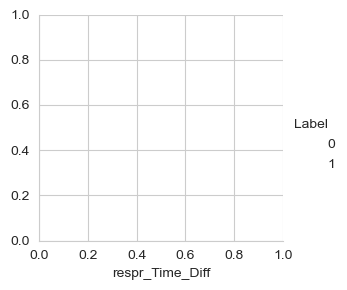

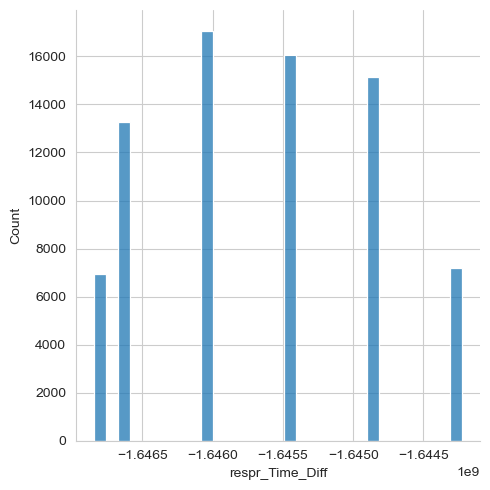

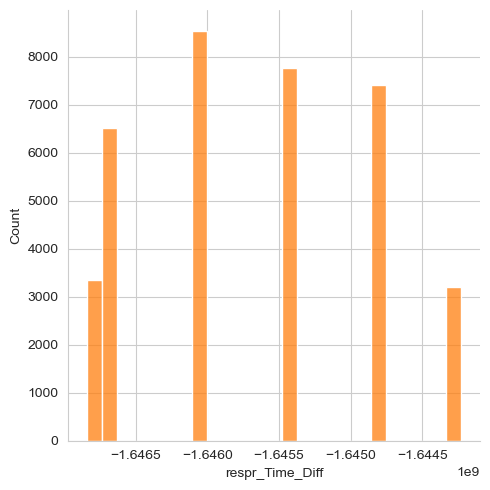

c:\Users\ayush\anaconda3\Lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\ayush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\ayush\anaconda3\Lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\ayush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


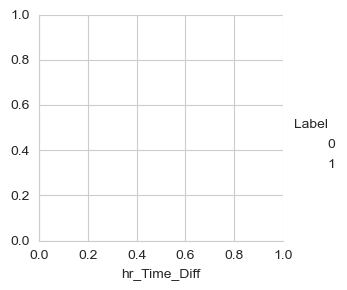

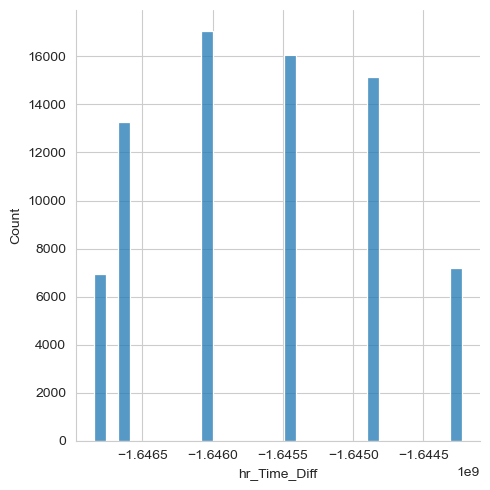

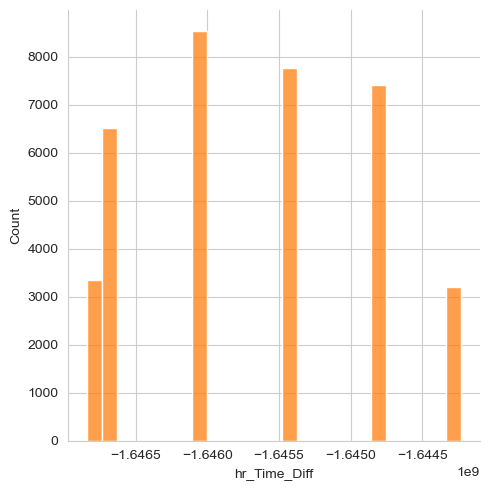

In [21]:
for i in data.columns:
    if i == 'Label':
        continue
    sns.set_style('whitegrid')
    sns.FacetGrid(data,hue='Label')\
    .map(sns.displot,i)\
    .add_legend()
    plt.show()



In [22]:
data.head()

,Participant,HR,respr,Time(sec),Label,respr_HR_Diff,respr_Time_Diff,hr_Time_Diff
0,2,118.00,12.127693,1644227583,0,-105.872307,-1.644228e+09,-1.644227e+09
1,2,113.50,12.127693,1644227584,0,-101.372307,-1.644228e+09,-1.644227e+09
2,2,93.00,12.127693,1644227585,0,-80.872307,-1.644228e+09,-1.644227e+09
3,2,93.25,12.127693,1644227586,0,-81.122307,-1.644228e+09,-1.644227e+09
4,2,86.40,12.127693,1644227587,0,-74.272307,-1.644228e+09,-1.644228e+09


In [23]:
x = data[['HR','respr','Time(sec)']]
y = data[['Label']]

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.30, random_state=100)

In [25]:
xt, xv, yt, yv = train_test_split(x, y, test_size=0.30,random_state=42)

In [39]:
Participant_Clf = DecisionTreeClassifier(criterion='entropy',random_state= 100, max_depth=3, min_samples_leaf=5)
Participant_Clf.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

[Text(0.5769230769230769, 0.875, 'x[0] <= 72.475\nentropy = 0.911\nsamples = 78761\nvalue = [53067, 25694]'),
 Text(0.3076923076923077, 0.625, 'x[2] <= 1646040512.0\nentropy = 0.764\nsamples = 23398\nvalue = [18203, 5195]'),
 Text(0.15384615384615385, 0.375, 'x[0] <= 70.145\nentropy = 0.642\nsamples = 10265\nvalue = [8590, 1675]'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.529\nsamples = 6979\nvalue = [6143, 836]'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.82\nsamples = 3286\nvalue = [2447, 839]'),
 Text(0.46153846153846156, 0.375, 'x[1] <= 8.762\nentropy = 0.839\nsamples = 13133\nvalue = [9613, 3520]'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.877\nsamples = 300\nvalue = [89, 211]'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.823\nsamples = 12833\nvalue = [9524, 3309]'),
 Text(0.8461538461538461, 0.625, 'x[2] <= 1646841152.0\nentropy = 0.951\nsamples = 55363\nvalue = [34864, 20499]'),
 Text(0.7692307692307693, 0.375, 'x[1] <= 7.203\nentropy = 0.953\nsamples = 54926

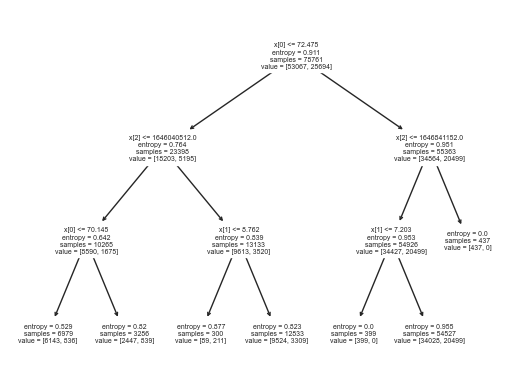

In [40]:
tree.plot_tree(Participant_Clf)

In [44]:
y_predict = Participant_Clf.predict(X_test)
print(y_predict)

[0 0 0 ... 0 0 0]


In [28]:
##dot_data = tree.export_graphviz(Participant_Clf,out_file=None)

##graph = graphviz.Source(dot_data)
##graph

In [29]:
print("Accuracy score is : ", cross_val_score(Participant_Clf,xt,yt,cv=3,scoring='accuracy').mean())

Accuracy score is :  0.9774761888129518


In [30]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [31]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score


In [34]:
Y_hat = Participant_Clf.predict(xv)

print("Accuracy score for validation test data : ",accuracy_score(yv,Y_hat))
multilabel_confusion_matrix(yv,Y_hat)
#

Accuracy score for validation test data :  0.9832617390016294


array([[[10799,   280],
        [  285, 22391]],

       [[22391,   285],
        [  280, 10799]]], dtype=int64)